In [1]:
import shelve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Plotting

In [3]:
with shelve.open("./Data/dims_ensemble/signals_ensemble") as data:
    datadicts = data['dicts']
    reservoir_dims = data['dims']
    t = data['time']

(10000, 3) (10000, 3)
Length of timeseries: 10000


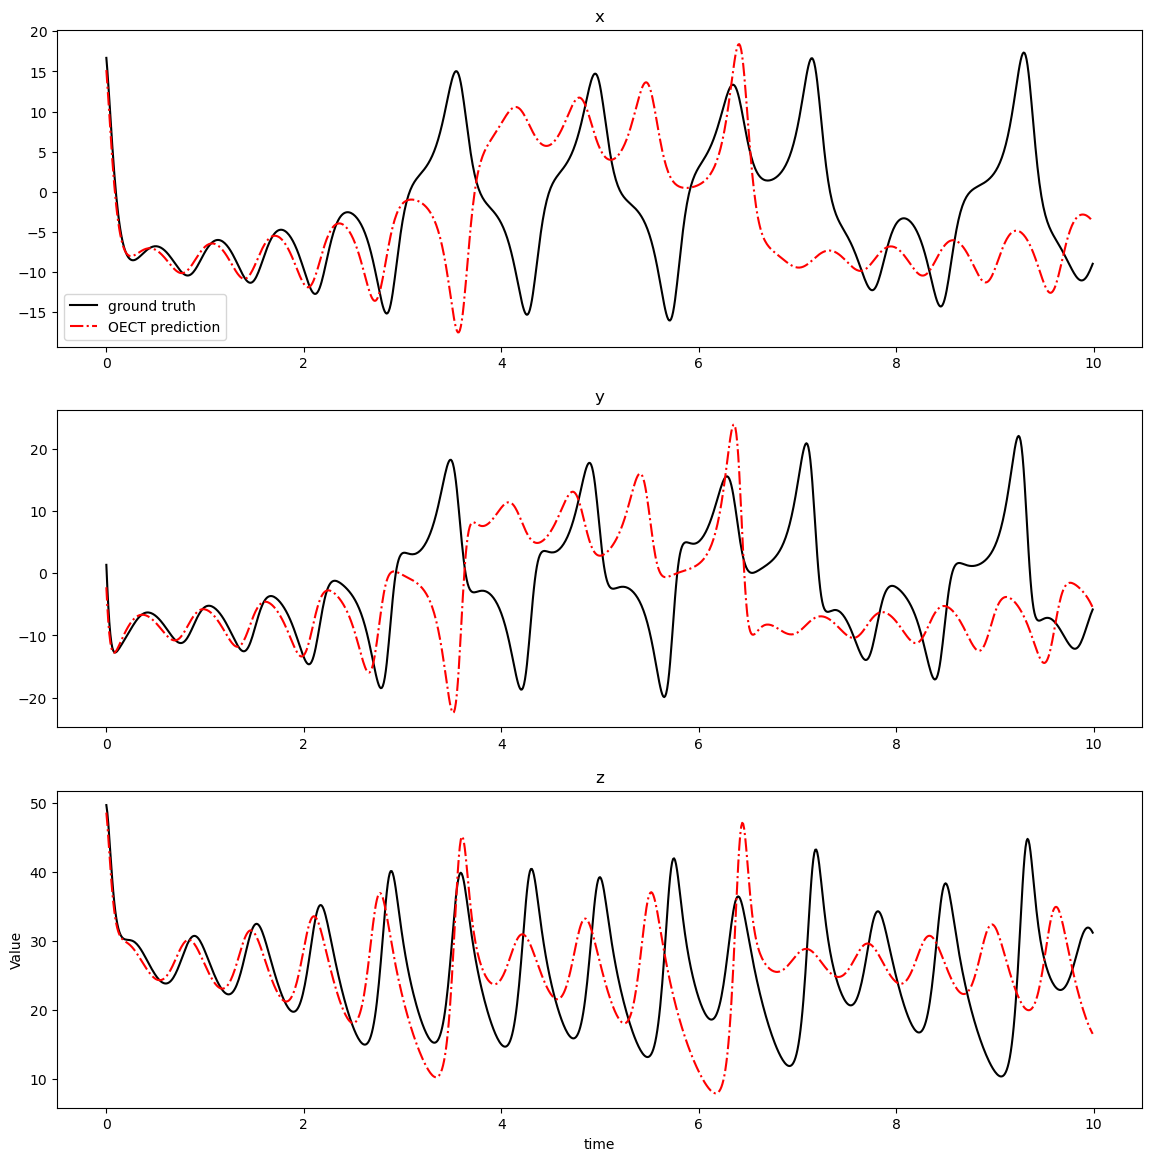

In [12]:
dimindex=1

OECT_signals = datadicts[0]["OECT_signals"][dimindex]
OECT_predictions = datadicts[0]["OECT_predictions"][dimindex]
tanh_signals = datadicts[0]["tanh_signals"][dimindex]
tanh_predictions = datadicts[0]["tanh_predictions"][dimindex]

print(np.array(OECT_signals).shape, np.array(OECT_predictions).shape)

plt.figure(figsize=(14, 14))

plot_index = 1

start = 0
end = 1000
end_3d = 10000

to_signals = tanh_signals
to_predictions = tanh_predictions

x_sig = [sig[0] for sig in to_signals]
y_sig = [sig[1] for sig in to_signals]
z_sig = [sig[2] for sig in to_signals]
x_pred = [pred[0] for pred in to_predictions]
y_pred = [pred[1] for pred in to_predictions]
z_pred = [pred[2] for pred in to_predictions]

print("Length of timeseries:", len(x_sig))


# x
plt.subplot(3, 1, plot_index)
plt.title("x")
plt.plot(t[start:end], x_sig[start:end], "k-", label="ground truth")
plt.plot(t[start:end], x_pred[start:end], "r-.", label="OECT prediction")

if plot_index == 1:
    plt.legend()
plot_index += 1

# y
plt.subplot(3, 1, plot_index)
plt.title("y")
plt.plot(t[start:end], y_sig[start:end], "k-", label="ground truth")
plt.plot(t[start:end], y_pred[start:end], "r-.", label="OECT prediction")
plot_index += 1

# z
plt.subplot(3, 1, plot_index)
plt.title("z")
plt.plot(t[start:end], z_sig[start:end], "k-", label="ground truth")
plt.plot(t[start:end], z_pred[start:end], "r-.", label="OECT prediction")
plot_index += 1


plt.ylabel("Value")
plt.xlabel("time")
plt.show()

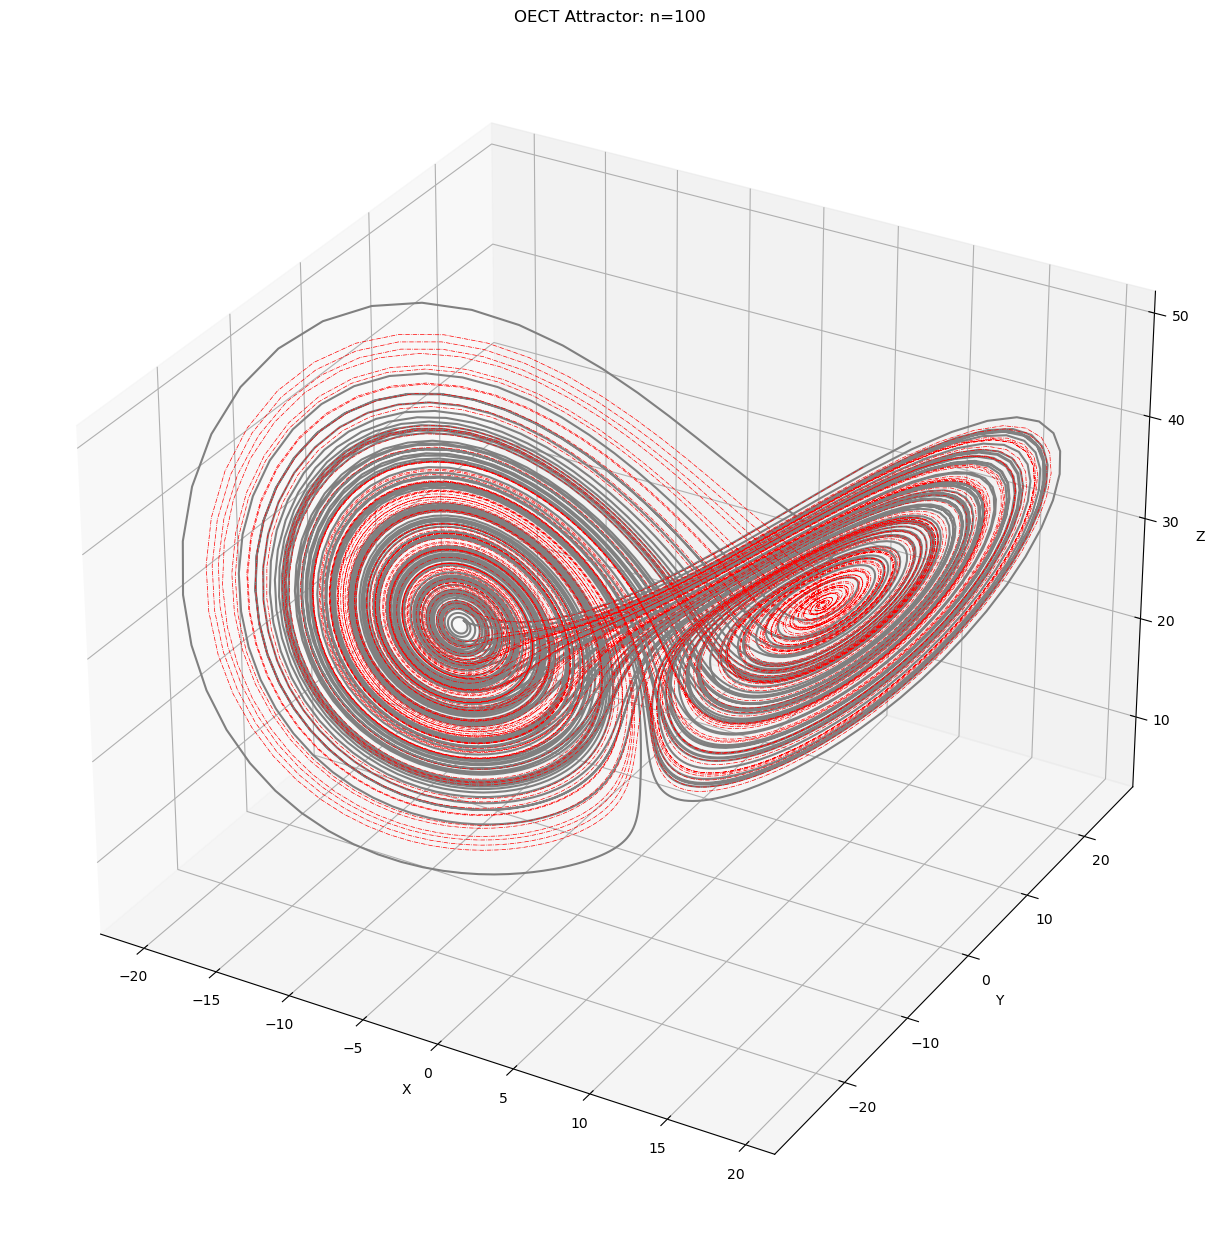

In [11]:
end = end_3d


fig, ax = plt.subplots(1, 1, figsize=(15, 15), subplot_kw=dict(projection="3d"))
# ax[0].axes(projection='3d')

ax.plot3D(x_sig[start:end], y_sig[start:end], z_sig[start:end], "gray")
ax.plot3D(x_pred[start:end], y_pred[start:end], z_pred[start:end], "r-.", lw=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("OECT Attractor: n=100")

# ax[0,1].axes(projection='3d')

# ax[0, 1].plot3D(x_sig[start:end], y_sig[start:end], z_sig[start:end], "gray")
# ax[0, 1].plot3D(x_pred[start:end], y_pred[start:end], z_pred[start:end], "r-.", lw=0.5)

# ax[0, 1].set_xlabel("X")
# ax[0, 1].set_ylabel("Y")
# ax[0, 1].set_zlabel("Z")
# ax[0, 1].set_title("Attractor Results")
# ax[0, 1].view_init(15, 60)

# ax[1, 0].plot3D(x_sig[start:end], y_sig[start:end], z_sig[start:end], "gray")
# ax[1, 0].plot3D(x_pred[start:end], y_pred[start:end], z_pred[start:end], "r-.", lw=0.5)

# ax[1, 0].set_xlabel("X")
# ax[1, 0].set_ylabel("Y")
# ax[1, 0].set_zlabel("Z")
# ax[1, 0].set_title("Attractor Results")
# ax[1, 0].view_init(65, 85)

# ax[1, 1].plot3D(x_sig[start:end], y_sig[start:end], z_sig[start:end], "gray")
# ax[1, 1].plot3D(x_pred[start:end], y_pred[start:end], z_pred[start:end], "r-.", lw=0.5)

# ax[1, 1].set_xlabel("X")
# ax[1, 1].set_ylabel("Y")
# ax[1, 1].set_zlabel("Z")
# ax[1, 1].set_title("Attractor Results")
# ax[1, 1].view_init(-30, 50)

# reduce whitespace around 3d plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()
